<a href="https://colab.research.google.com/github/isabelesb/Fraude_no_cartao_de_credito/blob/main/DataPreparation%2BModelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bibliotecas:

In [23]:
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

from imblearn.over_sampling import RandomOverSampler

In [2]:
df = pd.read_csv('/content/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Tratamento dos dados:

In [3]:
# Droppando os valores  0 nas transações.
df_ = df.query('Amount!=0')

In [4]:
# Droppando os dados duplicados.
df_ = df_.drop_duplicates()

In [5]:
df_.duplicated().sum()

0

In [6]:
# Separando os dados em featuress e target e normalizando as features.
x = df_.drop(columns='Class')
y = df_.Class

mms = MinMaxScaler()
x = pd.DataFrame(mms.fit_transform(x), columns=x.columns)

In [7]:
# Separando os dados em treino e teste.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [8]:
# Balanceando os dados de treino.

os = RandomOverSampler(sampling_strategy='minority')
x_over, y_over = os.fit_resample(x_train, y_train)

## Modelos:

### Regressão Logística:

In [13]:
# Criando o modelo, treinando e testando
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

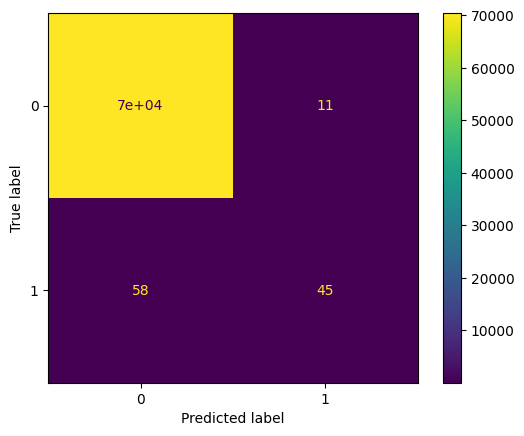

In [14]:
# Exibindo a matriz de confusão
lr_cm = confusion_matrix(y_test, y_pred_lr, labels=lr.classes_)
lr_disp = ConfusionMatrixDisplay(confusion_matrix=lr_cm, display_labels=lr.classes_)
lr_disp.plot()

In [11]:
# Criando o modelo, treinando e testando, com os dados do Over Sample
lr_over = LogisticRegression()
lr_over.fit(x_over, y_over)
y_pred_lr_over = lr_over.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


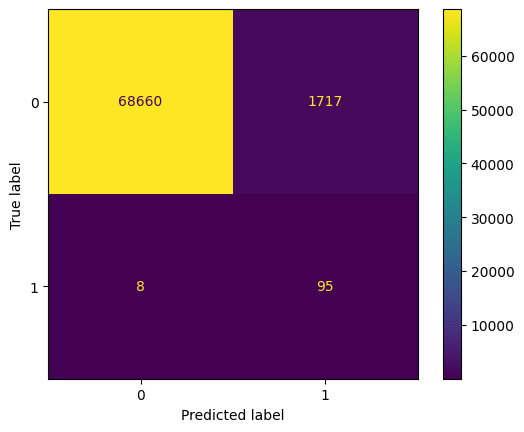

In [12]:
# Exibindo a matriz de confusão
lr_over_cm = confusion_matrix(y_test, y_pred_lr_over, labels=lr_over.classes_)
lr_over_disp = ConfusionMatrixDisplay(confusion_matrix=lr_over_cm, display_labels=lr_over.classes_)
lr_over_disp.plot()

In [15]:
# Mostrando as métricas e comparando treino com teste para analisar possível over fitting.
print(f'Acurácia - Treino: {accuracy_score(y_train, lr.predict(x_train))}')
print(f'Acurácia - Teste: {accuracy_score(y_test, y_pred_lr)}')
print(10*'-+-')
print(f'Acurácia Balanceada - Treino: {balanced_accuracy_score(y_train, lr.predict(x_train))}')
print(f'Acurácia Balanceada - Teste: {balanced_accuracy_score(y_test, y_pred_lr)}')
print(10*'-+-')
print(f'F1 - Treino: {f1_score(y_train, lr.predict(x_train))}')
print(f'F1 - Teste: {f1_score(y_test, y_pred_lr)}')
print(10*'-+-')
print(10*'-+-')
print(f'Acurácia Over - Treino: {accuracy_score(y_train, lr_over.predict(x_train))}')
print(f'Acurácia Over - Teste: {accuracy_score(y_test, y_pred_lr_over)}')
print(10*'-+-')
print(f'Acurácia Balanceada Over - Treino: {balanced_accuracy_score(y_train, lr_over.predict(x_train))}')
print(f'Acurácia Balanceada Over - Teste: {balanced_accuracy_score(y_test, y_pred_lr_over)}')
print(10*'-+-')
print(f'F1 Over - Treino: {f1_score(y_train, lr_over.predict(x_train))}')
print(f'F1 Over - Teste: {f1_score(y_test, y_pred_lr_over)}')

Acurácia - Treino: 0.9990115305668801
Acurácia - Teste: 0.9990209988649262
-+--+--+--+--+--+--+--+--+--+-
Acurácia Balanceada - Treino: 0.7405086514172577
Acurácia Balanceada - Teste: 0.7183684514096135
-+--+--+--+--+--+--+--+--+--+-
F1 - Treino: 0.6136783733826248
F1 - Teste: 0.5660377358490566
-+--+--+--+--+--+--+--+--+--+-
-+--+--+--+--+--+--+--+--+--+-
Acurácia Over - Treino: 0.9761632251534729
Acurácia Over - Teste: 0.9755249716231555
-+--+--+--+--+--+--+--+--+--+-
Acurácia Balanceada Over - Treino: 0.9417611181334526
Acurácia Balanceada Over - Teste: 0.9489664609369428
-+--+--+--+--+--+--+--+--+--+-
F1 Over - Treino: 0.11048358630427109
F1 Over - Teste: 0.09921671018276762


Percebemos que o modelo com over sample foi melhor apenas na acurácia balanceada. E que não há over fitting em nenhum dos dois.

### Random Forest:

In [16]:
# Criando o modelo, treinando e testando
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred_rf = (rf.predict(x_test))

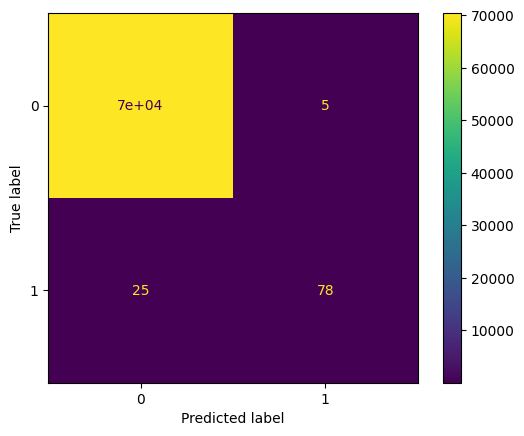

In [17]:
# Exibindo a matriz de confusão
rf_cm = confusion_matrix(y_test, y_pred_rf, labels=rf.classes_)
rf_disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=rf.classes_)
rf_disp.plot()

In [18]:
# Criando o modelo, treinando e testando, com over sample.
rf_over = RandomForestClassifier()
rf_over.fit(x_over, y_over)
y_pred_rf_over = (rf_over.predict(x_test))

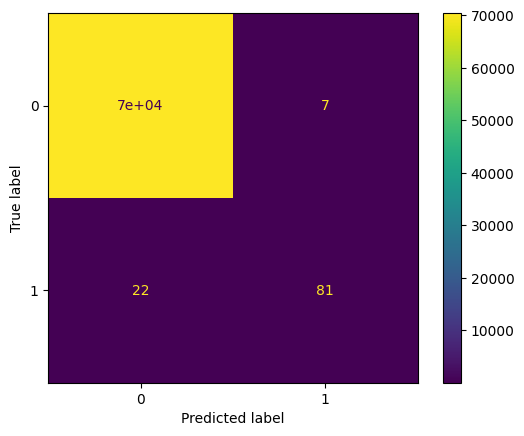

In [22]:
# Exibindo a matriz de confusão.
rf_over_cm = confusion_matrix(y_test, y_pred_rf_over, labels=rf_over.classes_)
rf_over_disp = ConfusionMatrixDisplay(confusion_matrix=rf_over_cm, display_labels=rf_over.classes_)
rf_over_disp.plot()

In [21]:
# Mostrando as métricas e comparando treino com teste para analisar possível over fitting.
print(f'Acurácia - Treino: {accuracy_score(y_train, rf.predict(x_train))}')
print(f'Acurácia - Teste: {accuracy_score(y_test, y_pred_rf)}')
print(10*'-+-')
print(f'Acurácia Balanceada - Treino: {balanced_accuracy_score(y_train, rf.predict(x_train))}')
print(f'Acurácia Balanceada - Teste: {balanced_accuracy_score(y_test, y_pred_rf)}')
print(10*'-+-')
print(f'F1 - Treino: {f1_score(y_train, rf.predict(x_train))}')
print(f'F1 - Teste: {f1_score(y_test, y_pred_rf)}')
print(10*'-+-')
print(10*'-+-')
print(f'Acurácia Over - Treino: {accuracy_score(y_train, rf_over.predict(x_train))}')
print(f'Acurácia Over - Teste: {accuracy_score(y_test, y_pred_rf_over)}')
print(10*'-+-')
print(f'Acurácia Balanceada Over - Treino: {balanced_accuracy_score(y_train, rf_over.predict(x_train))}')
print(f'Acurácia Balanceada Over - Teste: {balanced_accuracy_score(y_test, y_pred_rf_over)}')
print(10*'-+-')
print(f'F1 Over - Treino: {f1_score(y_train, rf_over.predict(x_train))}')
print(f'F1 Over - Teste: {f1_score(y_test, y_pred_rf_over)}')

Acurácia - Treino: 1.0
Acurácia - Teste: 0.9995743473325767
-+--+--+--+--+--+--+--+--+--+-
Acurácia Balanceada - Treino: 1.0
Acurácia Balanceada - Teste: 0.8786052537298772
-+--+--+--+--+--+--+--+--+--+-
F1 - Treino: 1.0
F1 - Teste: 0.8387096774193549
-+--+--+--+--+--+--+--+--+--+-
-+--+--+--+--+--+--+--+--+--+-
Acurácia Over - Treino: 1.0
Acurácia Over - Teste: 0.9995885357548241
-+--+--+--+--+--+--+--+--+--+-
Acurácia Balanceada Over - Treino: 1.0
Acurácia Balanceada Over - Teste: 0.893154151338333
-+--+--+--+--+--+--+--+--+--+-
F1 Over - Treino: 1.0
F1 Over - Teste: 0.8481675392670157


Percebemos que as métricas foram boas, e pouco melhores com o over sample.

**Concluimos aqui que o melhor modelo para prosseguir é o Random Forest, na versão com Over Sample.**